In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory. 
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
import requests
requests.__version__

'2.26.0'

In [8]:
# Import the API key.
from config import weather_api_key

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0d21a3496af4cbb0bf7a2cd6c497ea10'

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | port blair
Processing Record 2 of Set 12 | lavrentiya
Processing Record 3 of Set 12 | qiongshan
Processing Record 4 of Set 12 | mataura
Processing Record 5 of Set 12 | urengoy
Processing Record 6 of Set 12 | rio cuarto
Processing Record 7 of Set 12 | kamenka
Processing Record 8 of Set 12 | ushuaia
Processing Record 9 of Set 12 | la ronge
Processing Record 10 of Set 12 | yerbogachen
Processing Record 11 of Set 12 | punta arenas
Processing Record 12 of Set 12 | port alfred
Processing Record 13 of Set 12 | thompson
Processing Record 14 of Set 12 | rikitea
Processing Record 15 of Set 12 | barentsburg
City not found. Skipping...
Processing Record 16 of Set 12 | dikson
Processing Record 17 of Set 12 | puerto ayora
Processing Record 18 of Set 12 | maceio
Processing Record 19 of Set 12 | vila do maio
Processing Record 20 of Set 12 | praia da vitoria
Processing Record 21 of Set 12 | provideniya
Processin

Processing Record 36 of Set 15 | tumannyy
City not found. Skipping...
Processing Record 37 of Set 15 | souillac
Processing Record 38 of Set 15 | tarbagatay
Processing Record 39 of Set 15 | nikolskoye
Processing Record 40 of Set 15 | goderich
Processing Record 41 of Set 15 | yandyki
Processing Record 42 of Set 15 | sechura
Processing Record 43 of Set 15 | upernavik
Processing Record 44 of Set 15 | igrim
Processing Record 45 of Set 15 | luderitz
Processing Record 46 of Set 15 | kolpashevo
Processing Record 47 of Set 15 | roald
Processing Record 48 of Set 15 | aberystwyth
Processing Record 49 of Set 15 | saldanha
Processing Record 50 of Set 15 | ust-kut
Processing Record 1 of Set 16 | albania
Processing Record 2 of Set 16 | barbar
City not found. Skipping...
Processing Record 3 of Set 16 | lompoc
Processing Record 4 of Set 16 | ahipara
Processing Record 5 of Set 16 | coquimbo
Processing Record 6 of Set 16 | ben tre
Processing Record 7 of Set 16 | esperance
Processing Record 8 of Set 16 | 

Processing Record 22 of Set 19 | saint-louis
Processing Record 23 of Set 19 | orumiyeh
Processing Record 24 of Set 19 | saint anthony
Processing Record 25 of Set 19 | dalvik
Processing Record 26 of Set 19 | baykit
Processing Record 27 of Set 19 | sentyabrskiy
City not found. Skipping...
Processing Record 28 of Set 19 | chuy
Processing Record 29 of Set 19 | tacna
Processing Record 30 of Set 19 | alberton
Processing Record 31 of Set 19 | el paso
Processing Record 32 of Set 19 | fairbanks
Processing Record 33 of Set 19 | yulara
Processing Record 34 of Set 19 | pativilca
Processing Record 35 of Set 19 | daru
Processing Record 36 of Set 19 | mandalgovi
Processing Record 37 of Set 19 | mozarlandia
Processing Record 38 of Set 19 | camana
Processing Record 39 of Set 19 | satitoa
City not found. Skipping...
Processing Record 40 of Set 19 | baldone
Processing Record 41 of Set 19 | kapit
Processing Record 42 of Set 19 | kahului
Processing Record 43 of Set 19 | belaya gora
Processing Record 44 of 

Processing Record 6 of Set 23 | lebane
Processing Record 7 of Set 23 | eucaliptus
Processing Record 8 of Set 23 | champerico
Processing Record 9 of Set 23 | quatre cocos
Processing Record 10 of Set 23 | kalat
Processing Record 11 of Set 23 | biak
Processing Record 12 of Set 23 | paka
Processing Record 13 of Set 23 | lovozero
Processing Record 14 of Set 23 | tautira
Processing Record 15 of Set 23 | ferme-neuve
Processing Record 16 of Set 23 | mitsamiouli
Processing Record 17 of Set 23 | gurjaani
Processing Record 18 of Set 23 | lososina
Processing Record 19 of Set 23 | mehran
Processing Record 20 of Set 23 | amberley
Processing Record 21 of Set 23 | nicoya
Processing Record 22 of Set 23 | ahuimanu
Processing Record 23 of Set 23 | mayna
Processing Record 24 of Set 23 | erzin
Processing Record 25 of Set 23 | salamiyah
Processing Record 26 of Set 23 | pitanga
Processing Record 27 of Set 23 | vanimo
Processing Record 28 of Set 23 | guangyuan
Processing Record 29 of Set 23 | chumikan
Process

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,84.24,84,40,8.05,IN,2022-05-09 14:35:54
1,Lavrentiya,65.5833,-171.0000,19.44,90,100,5.97,RU,2022-05-09 14:35:54
2,Qiongshan,20.0058,110.3542,76.98,94,0,4.47,CN,2022-05-09 14:35:55
3,Mataura,-46.1927,168.8643,48.47,98,99,1.39,NZ,2022-05-09 14:35:56
4,Urengoy,65.9667,78.3667,35.22,100,100,10.87,RU,2022-05-09 14:35:56
5,Rio Cuarto,-33.1307,-64.3499,72.34,59,0,5.75,AR,2022-05-09 14:35:57
6,Kamenka,51.3223,42.7678,45.48,87,90,18.43,RU,2022-05-09 14:35:57
7,Ushuaia,-54.8000,-68.3000,44.26,70,40,9.22,AR,2022-05-09 14:35:57
8,La Ronge,55.1001,-105.2842,43.05,49,0,4.61,CA,2022-05-09 14:35:58
9,Yerbogachen,61.2767,108.0108,24.01,93,77,2.48,RU,2022-05-09 14:35:58


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

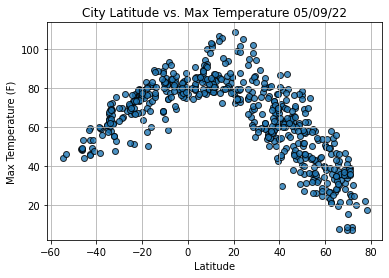

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

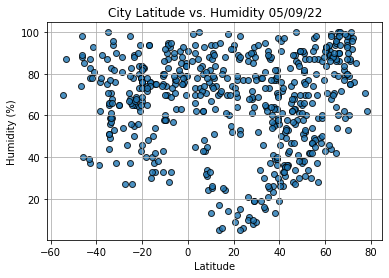

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

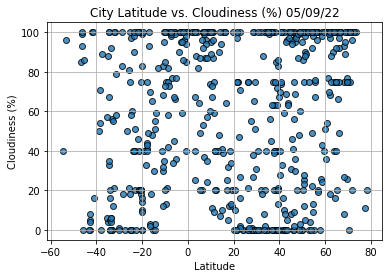

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

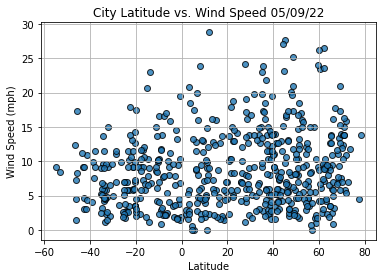

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a Linear Regression Function

In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    76.39
Humidity                       65
Cloudiness                     20
Wind Speed                  10.13
Country                        PF
Date          2022-05-09 14:32:28
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
551     True
552    False
553    False
554     True
555    False
Name: Lat, Length: 556, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,84.24,84,40,8.05,IN,2022-05-09 14:35:54
1,Lavrentiya,65.5833,-171.0000,19.44,90,100,5.97,RU,2022-05-09 14:35:54
2,Qiongshan,20.0058,110.3542,76.98,94,0,4.47,CN,2022-05-09 14:35:55
4,Urengoy,65.9667,78.3667,35.22,100,100,10.87,RU,2022-05-09 14:35:56
6,Kamenka,51.3223,42.7678,45.48,87,90,18.43,RU,2022-05-09 14:35:57


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

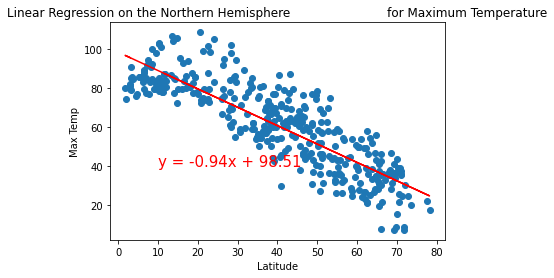

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

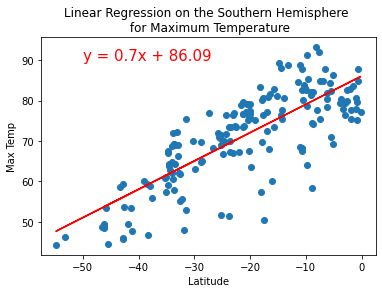

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

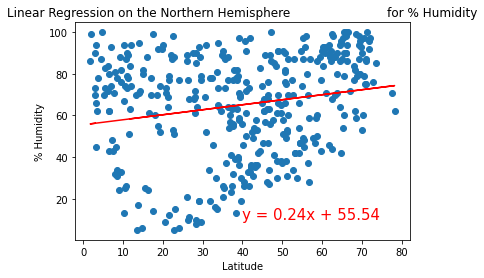

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

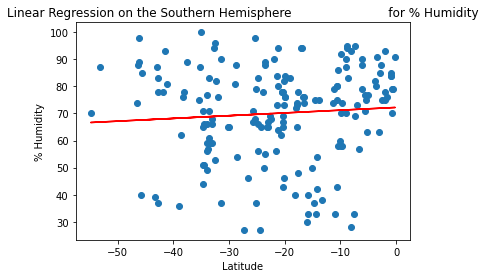

In [27]:
# Linear regression on the Sorthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

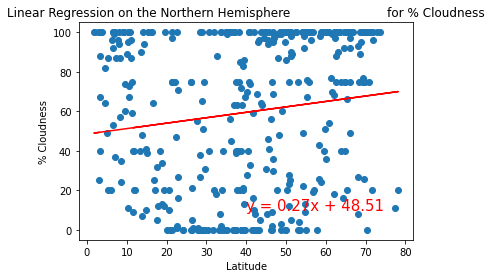

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudness', '% Cloudness',(-50,60))

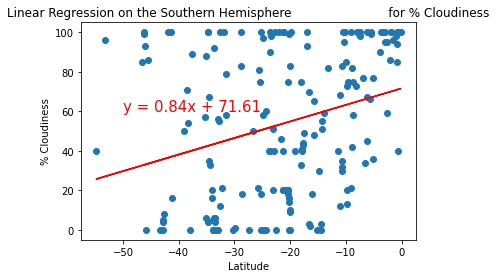

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

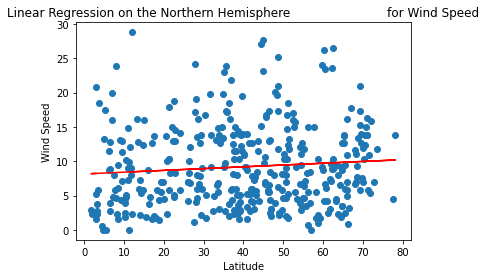

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

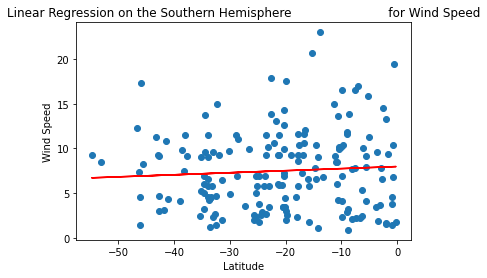

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))